In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
seed=42
np.random.seed(seed)

In [3]:
def plot_data(
        X_train: np.ndarray,
        X_test: np.ndarray,
        y_train: np.ndarray,
        y_test: np.ndarray) -> None:
    # -------------------------------------------
    # scatter training data
    # class 1
    plt.scatter(
        X_train[y_train==1][0:, 0],
        X_train[y_train==1][0:, 1],
        label='Class: 1 (train)',
        color='deepskyblue',
        marker='o'
    )

    # class -1
    plt.scatter(
        X_train[y_train==-1][0:, 0],
        X_train[y_train==-1][0:, 1],
        label='Class: -1 (train)',
        color='orange',
        marker='o'
    )

    # -------------------------------------------
    # scatter test data
    # class 1
    plt.scatter(
        X_test[y_test==1][0:, 0],
        X_test[y_test==1][0:, 1],
        label='Class: 1 (test)',
        color='deepskyblue',
        marker='x'
    )

    # class -1
    plt.scatter(
        X_test[y_test==-1][0:, 0],
        X_test[y_test==-1][0:, 1],
        label='Class: -1 (test)',
        color='orange',
        marker='x'
    )

    plt.legend()

In [4]:
def plot_estimator(
        clf: SVC,
        X_train: np.ndarray,
        color: str='red'):

    # select maximum and minimum on x1 axis
    x1_min = np.min(X_train[0:,0])
    x1_max = np.max(X_train[0:,0])
    X_full = np.linspace(4, 7, 1000)
    # X_full = np.linspace(x1_min, x1_max, 1000)
    
    # calculating hyperplane
    w, b = clf.coef_[0], clf.intercept_[0]
    hyperplane = lambda x: (-w[0]/w[1]) * x + (-1/w[1]) * b

    # calculating margin
    sup_vec = clf.support_vectors_[0]
    margin = np.abs(np.dot(w, sup_vec) + b) / ((w[0]**2 + w[1]**2) ** 0.5)

    plt.plot(X_full, hyperplane(X_full) + margin, color=color, linestyle='--')
    plt.plot(X_full, hyperplane(X_full), color=color, label='Hyperplane')
    plt.plot(X_full, hyperplane(X_full) - margin, color=color, linestyle='--')
    plt.legend()

In [5]:
# -------------------------------------------
# create dataset
X, y = load_iris(return_X_y=True)
X = X[:, [0, 1]]

# focus only on cases where y == 0 and y == 1
# change y=0 -> y=-1
y = np.where(y==0, -1, y)

# split for training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (120, 2)
Shape of y_train: (120,)
Shape of X_test: (30, 2)
Shape of y_test: (30,)


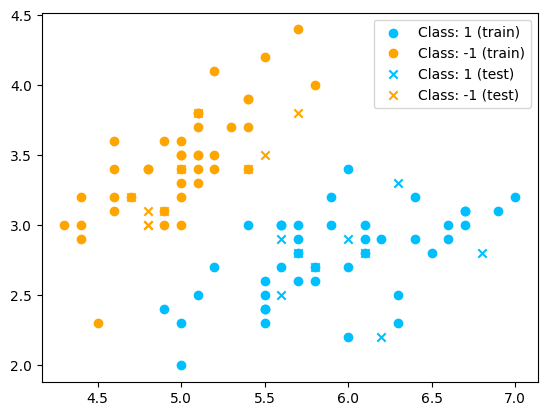

In [6]:
# plot data
plot_data(X_train, X_test, y_train, y_test)
plt.show()

In [7]:
hyper_params = [
    {'C': 0.1, 'kernel': 'linear'},
    {'C': 0.5, 'kernel': 'linear'},
    {'C': 1, 'kernel': 'linear'},
    {'C': 4, 'kernel': 'linear'},
    {'C': 100, 'kernel': 'linear'},
    {'C': 1000, 'kernel': 'linear'}]

models = []
for params in hyper_params:
    clf = SVC(**params) 
    clf.fit(X_train, y_train)
    models.append(clf)

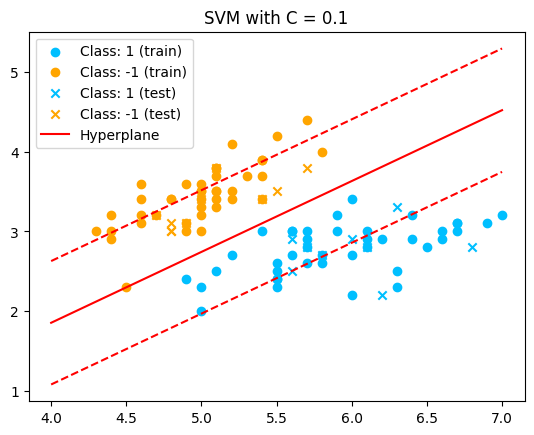

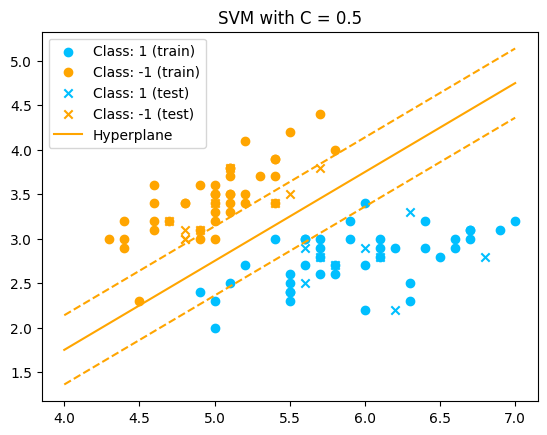

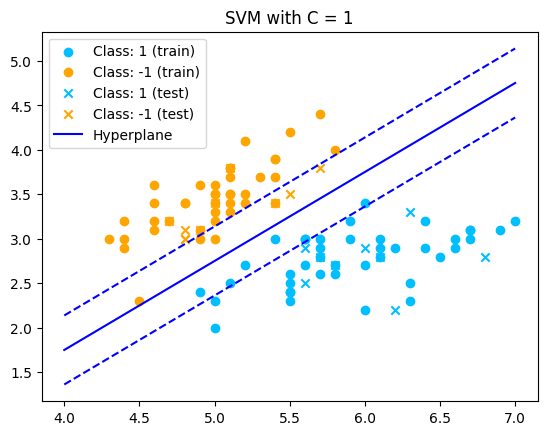

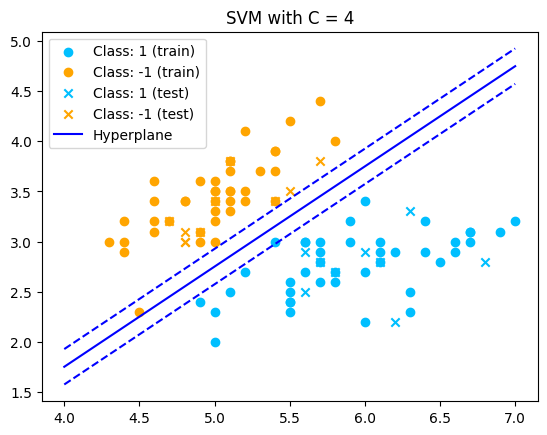

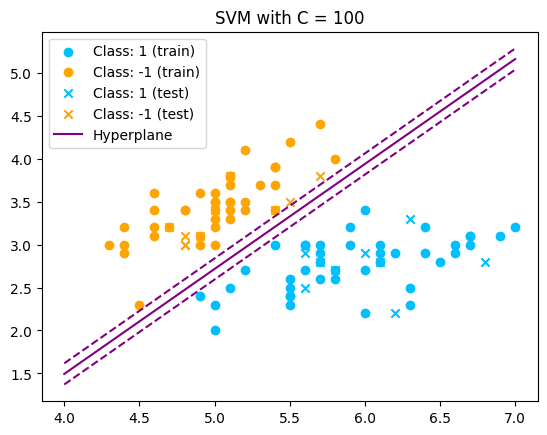

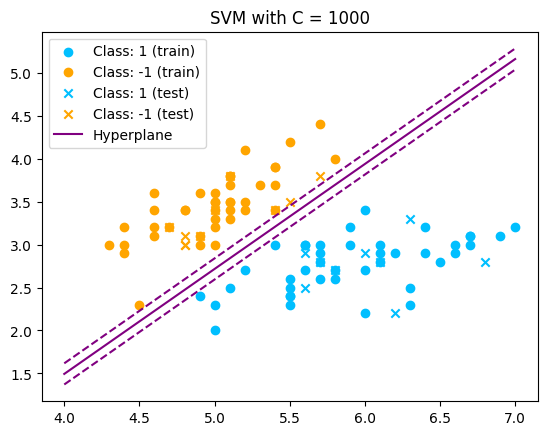

In [8]:
colors=[random.choice(['red', 'orange', 'blue', 'purple']) for _ in range(len(models))]

for n, clf in enumerate(models):
    plt.title(f'SVM with C = {hyper_params[n]['C']}') 
    plot_data(X_train, X_test, y_train, y_test)
    plot_estimator(
        clf=clf,
        X_train=X_train,
        color=colors[n])
    plt.show()